
# SIR model


In the following we analys a much simpler model not taking into account neither the mortality rate nor the birth rate (assume they are more or less equal). The key point is the knowledge of $I(0)$, $a$. Assume that we do not loose anyone, so the total population is constant. This reduces to the simple system:
\begin{align}
\dot{S}(t)&=-a S(t)\cdot I(t)+c\cdot R(t)-d\cdot S(t)\\
\dot{I}(t)&=a S(t)\cdot I(t)-b\cdot I(t)\\
\dot{R}(t)&=b\cdot I(t)-c\cdot R(t)+d\cdot S(t)\\
\end{align}

Using the slider widget to control visual properties of our plot.




In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy.integrate import odeint # Scipy integrate is for numerical integration odeint is self explaining

In [10]:
# Update the values to plot
def update(val):
    pos=odeint(funcupdate,n0,t)
    l1.set_ydata(pos.T[0])
    l2.set_ydata(pos.T[1])
    l3.set_ydata(pos.T[2])
    fig.canvas.draw_idle()
# Reset the parameters
def reset(event):
    sinf.reset()
    srec.reset()
    ssus.reset()
    svac.reset()
#
def funcupdate(n,t):
    s,i,r=n
    a=sinf.val      # rate of infection
    b=srec.val      # rate of recovery
    c=ssus.val      # rate of suszeptibility
    d=svac.val      # rate of vaccination
    # here you enter the differential equation system
    dsdt=-a*s*i+c*r-d*s
    didt=a*s*i-b*i
    drdt=b*i-c*r+d*s
    #
    return dsdt,didt,drdt
#
#
def func(n,t):
    s,i,r=n  
    # here you enter the differential equation system
    dsdt=-a*s*i+c*r-d*s
    didt=a*s*i-b*i
    drdt=b*i-c*r+d*s
    #
    return dsdt,didt,drdt

In [11]:
# here you integrate the DE and make a side by side plot
#starttime=time.time()
a0=1.      # rate of infection
b0=1.      # rate of recovery
c0=1.      # rate of suszeptibility
d0=1.      # rate of vaccination
a,b,c,d=a0,b0,c0,d0
eps=0.1
n0=[1.0-eps,eps,0.]
t=np.linspace(0,10,100000)  # We do 10000 steps in the iterval [0,100]
pos=odeint(func,n0,t) # Integrate the system of differential equations
#endtime=time.time()
#print("{} s".format(endtime-starttime))

<IPython.core.display.Javascript object>


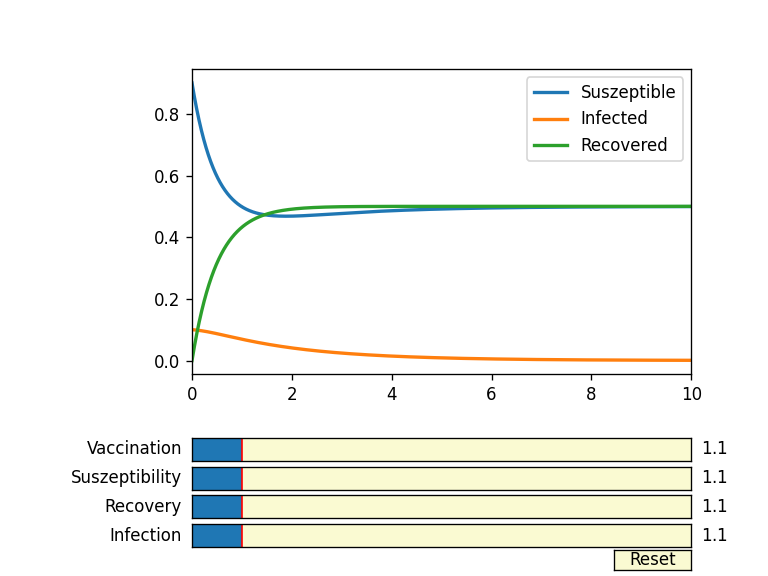

In [12]:
%matplotlib notebook
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.35)
#
s=pos.T[0]
i=pos.T[1]
r=pos.T[2]
#
l1, = plt.plot(t,s, lw=2, label='Suszeptible')
l2, = plt.plot(t,i, lw=2, label='Infected')
l3, = plt.plot(t,r, lw=2, label='Recovered')
#ax.plot(t,s,lw=2)
plt.legend()
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
#axfreq = plt.axes([0.25, 0.1, 0.65, 0.04], facecolor=axcolor)
#axamp = plt.axes([0.25, 0.15, 0.65, 0.04], facecolor=axcolor)
axinf = plt.axes([0.25, 0.05, 0.65, 0.04], facecolor=axcolor)
axrec = plt.axes([0.25, 0.1, 0.65, 0.04], facecolor=axcolor)
axsus = plt.axes([0.25, 0.15, 0.65, 0.04], facecolor=axcolor)
axvac = plt.axes([0.25, 0.2, 0.65, 0.04], facecolor=axcolor)
# Define a slider for the frequency
sinf = Slider(axinf, 'Infection', 0.1, 10.0, valinit=a0, valstep=0.5)
srec = Slider(axrec, 'Recovery', 0.1, 10.0, valinit=b0, valstep=0.5)
ssus = Slider(axsus, 'Suszeptibility', 0.1, 10.0, valinit=c0, valstep=0.5)
svac = Slider(axvac, 'Vaccination', 0.1, 10.0, valinit=d0, valstep=0.5)
#
sinf.on_changed(update)
srec.on_changed(update)
ssus.on_changed(update)
svac.on_changed(update)
#samp.on_changed(update)
#
resetax = plt.axes([0.8, 0.01, 0.1, 0.035])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
button.on_clicked(reset)
#
plt.show()

In [3]:
np.linspace(0,1.,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Hier kann man Text schreiben.

1. Erstes Element
1. Zweites